## Health Insuarance Claim 

### Objective:

1. Determine the factors that contribute the most in the calculation of insurance costs.
2. Predict the health Insurance Cost.

### Actions to Perform:

1. Find the correlation of every pair of features (and the outcome variable).
2. Visualize the correlations using a heatmap.
3. Normalize your inputs.
4. Use the test data to find out the accuracy of the model.
5. Visualize how your model uses the different features and which features have a greater effect.

###### Independent variable

1. age : age of policyholder
2. sex: gender of policy holder (female=0, male=1)
3. bmi: Body mass index, ideally 18.5 to 25
4. children: number of children / dependents of policyholder
5. smoker: smoking state of policyholder (non-smoke=0;smoker=1)
6. region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
7. charges: individual medical costs billed by health insurance
    
###### Target variable

1. Insuranceclaim : categorical variable(0,1)

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

dataset = pd.read_csv('Insurance2.csv')

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


###### There is no missing value in this dataset

In [5]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [6]:
# chcking the correlation between the variables and insuranceclaim

dataset.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


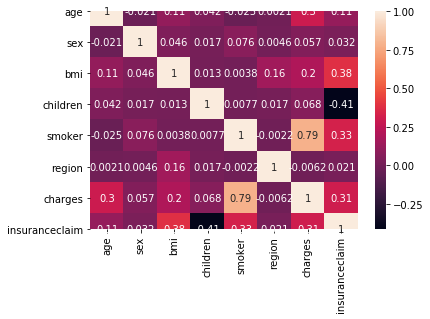

In [7]:
sns.heatmap(dataset.corr(), annot = True)

we can see here that only factor that has relation with insurance claim is bmi followed by smoker. children has the least relation with insurance claim. This shows that children are the least to admit to hospitals and least affected by accidents or other unpredicted factors. by bmi and smoker category we can say that unhealthy people are most likely to be unfit and also smoker are also highly admitted to hospitals

In [8]:
# defining the independent and target variable
X = dataset.drop('insuranceclaim', axis = 1)
y = dataset.insuranceclaim



Since, dataset consists of 1338 values, breaking X and Y in two set of 1200 and 138 value and assigning 138 value to X_new and y_new, for cross checking the model prediction on it

In [9]:
X = X.head(1200)
X_new = dataset[1200:]
X_new = X_new.drop('insuranceclaim', axis = 1)
print(X.shape)
print(X_new.shape)

(1200, 7)
(138, 7)


In [10]:
y_new = y[1200:]
y = y.head(1200)
print(y.shape)
print(y_new.shape)

(1200,)
(138,)


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [12]:
# scaling the dataset
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)
sc.transform(X_new)

array([[-0.16706602,  1.00716855, -1.06336662,  0.73952336, -0.50185943,
        -0.46387599, -0.59754629],
       [ 0.47082241,  1.00716855,  1.60104606,  0.73952336, -0.50185943,
        -0.46387599, -0.38379585],
       [-1.23021339,  1.00716855,  0.22942533, -0.92143819, -0.50185943,
        -0.46387599, -0.94699084],
       [ 0.82520487,  1.00716855,  0.26095684, -0.09095742, -0.50185943,
        -1.35758202, -0.27999117],
       [-1.51371936, -0.99288247, -0.57213887,  1.57000413,  1.99258982,
         0.42983004,  0.41658182],
       [-0.308819  ,  1.00716855, -2.13543799, -0.09095742, -0.50185943,
        -0.46387599, -0.68882022],
       [ 1.3922168 , -0.99288247,  0.67584514,  0.73952336, -0.50185943,
         1.32353608,  1.99260216],
       [-0.23794251,  1.00716855,  0.44350769,  0.73952336,  1.99258982,
         1.32353608,  2.11951817],
       [-0.16706602, -0.99288247, -0.8584118 , -0.09095742,  1.99258982,
        -1.35758202,  0.59144736],
       [ 1.3922168 ,  1.0071

In [13]:
# performing the  dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit_transform(X_train)
pca.transform(X_test)
pca.transform(X_new)

array([[ -7085.21480231],
       [ -4550.73304727],
       [-11228.64567457],
       [ -3319.90147705],
       [  4939.47794335],
       [ -8167.46740242],
       [ 23626.64781987],
       [ 25131.50603745],
       [  7012.89615878],
       [  -936.78655521],
       [ -7910.6020269 ],
       [ 10279.05012057],
       [-11581.51755456],
       [ -2477.12211762],
       [ -9327.89766954],
       [  -393.91421659],
       [ -7868.30431357],
       [ -9225.85180429],
       [ 28377.63723943],
       [ -5746.80190134],
       [ -8565.7654897 ],
       [ -6690.45728375],
       [ -4841.29538309],
       [ 12841.70142644],
       [ -6425.48576083],
       [ -8488.30960378],
       [ -6643.42214316],
       [ -6121.9516227 ],
       [ -2689.7339867 ],
       [ -1345.70353194],
       [ 46737.43511449],
       [  6883.36278744],
       [  -804.25240307],
       [ -1938.44111471],
       [ -4768.2050887 ],
       [-10584.40104459],
       [  1165.89560724],
       [ -1059.60885071],
       [ -62

In [14]:
# fitting the logistic regression model on training set and predicting the model
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = lg.predict(X_test)

In [16]:
metrics.accuracy_score(y_test, y_pred)

0.7694444444444445

In [17]:
y1_pred = lg.predict(X_new)

In [18]:
metrics.accuracy_score(y_new, y1_pred)

0.7536231884057971

In [19]:
# Applying K_Fold cross-validation
cv_accuracy = cross_val_score(estimator = lg, X = X_train, y = y_train, cv = 10)
print(cv_accuracy.mean())
print(cv_accuracy.std())

0.7988547467179643
0.03233908717215809


Text(0.5, 0, 'Importance')

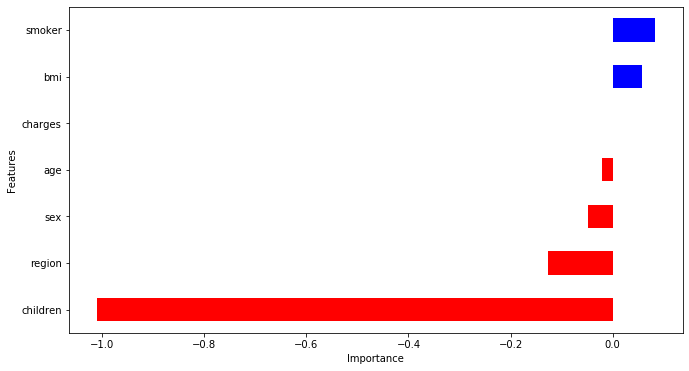

In [20]:
# Vsualising the model
coeff = list(lg.coef_[0])
labels = list(dataset.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

As we can see here smoker and bmi are the most relatable with insurance claim. Insurance claim is least dependent on children

1. BMI, Smoker have significant influence on the model, specially smoker.
2. Children have a negative influence on the prediction, i.e. higher number children / dependents are correlated with a policy holder who has not taken insurance claim.
3. Although age was more correlated than BMI to the output variables, the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables